In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

customers = pd.read_csv(
    filepath_or_buffer='data/customers.csv',
    index_col='Name',
)

customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9961 entries, Frank Manning to Sherry Nicholson
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  9961 non-null   object
dtypes: object(1)
memory usage: 155.6+ KB


,Address
Name,
Frank Manning,"6461 Quinn Groves, East Matthew, New Hampshire..."
Elizabeth Johnson,"1360 Tracey Ports Apt. 419, Kyleport, Vermont,..."
Donald Stephens,"19120 Fleming Manors, Prestonstad, Montana, 23495"
Michael Vincent III,"441 Olivia Creek, Jimmymouth, Georgia, 82991"
Jasmine Zamora,"4246 Chelsey Ford Apt. 310, Karamouth, Utah, 7..."


In [14]:
customers[["Street", "City", "State", "Zip"]] = customers["Address"].str.split(pat=',', expand=True)
customers = customers.drop(labels = "Address", axis = "columns")
customers.head()

,Street,City,State,Zip
Name,,,,
Frank Manning,6461 Quinn Groves,East Matthew,New Hampshire,16656
Elizabeth Johnson,1360 Tracey Ports Apt. 419,Kyleport,Vermont,31924
Donald Stephens,19120 Fleming Manors,Prestonstad,Montana,23495
Michael Vincent III,441 Olivia Creek,Jimmymouth,Georgia,82991
Jasmine Zamora,4246 Chelsey Ford Apt. 310,Karamouth,Utah,76252


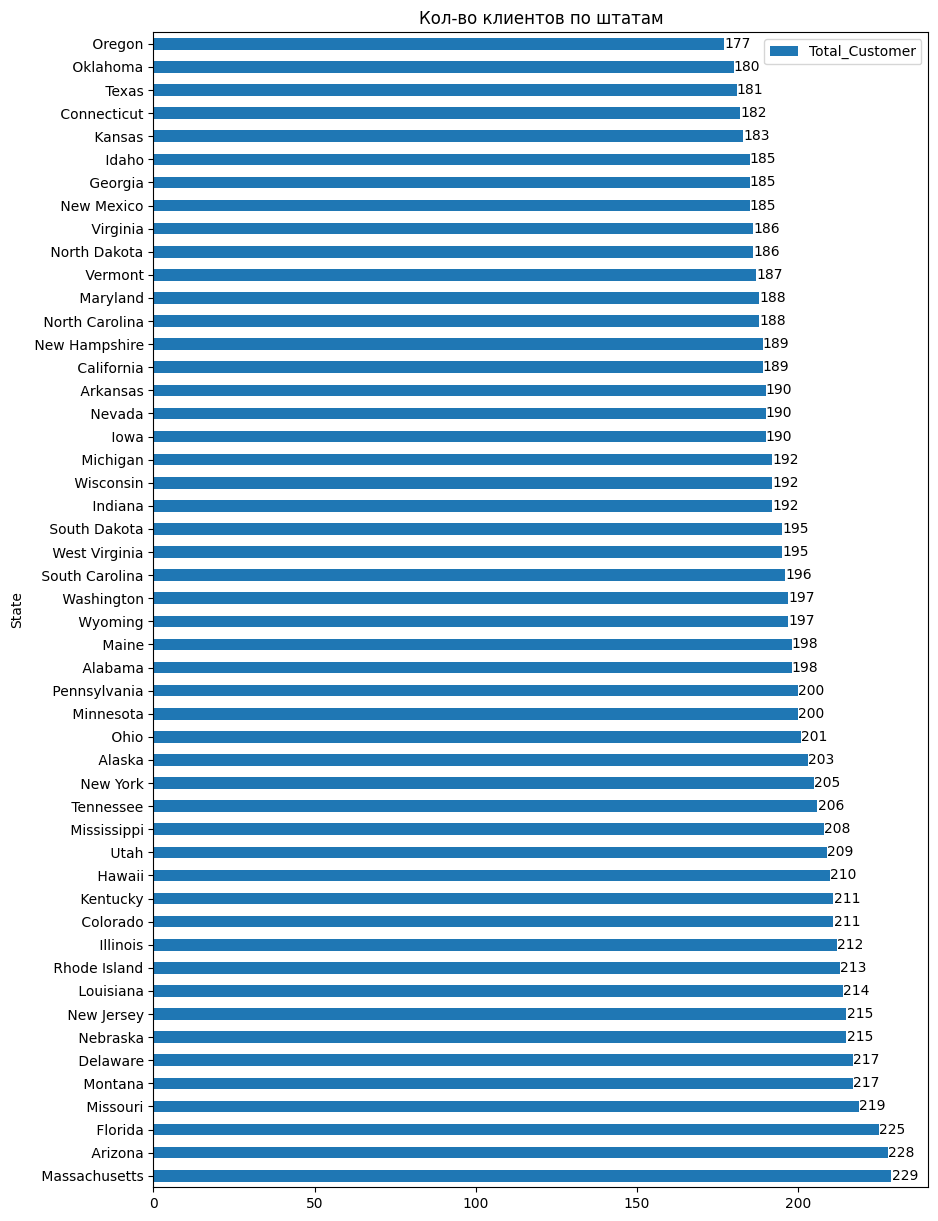

In [30]:
state = customers.groupby("State")
result = state["Street"].agg(
    Total_Customer='count',
).sort_values(by="Total_Customer", ascending=False)
result.head()
ax = result.plot(kind = "barh", legend = True, figsize = (10,15), title="Кол-во клиентов по штатам")
for container in ax.containers:
    ax.bar_label(container, padding = 0.1)
